# Notebook to generate to map space figure used in the paper

In [1]:
import sys
sys.path.append('../tools')
from plot_tools_mpl import *
from map_tools import *
from params import *
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
mapper = joblib.load('../tools/mapper.sav')
kde = joblib.load('../tools/kde_0_3.sav')

Load and combine test and validation sets, and generate their map space representations

In [4]:
data_path = Path('/Users/tommarianer/LOSC Data/gravityspy/trainingsets')
filename = 'trainingset_fromraw_centered_2048_Tc_64_' + condition_method + '_split.hdf5'

with h5py.File(join(data_path, filename), 'r') as f:
    y = [item.decode('ascii') for item in np.asarray(f['y_test'])]
    y = np.append(y, [item.decode('ascii') for item in np.asarray(f['y_val'])], axis=0)

data_path = join(features_path, 'fromraw_' + condition_method + '/' + model)
features_file = 'fromraw_' + condition_method + '_' + '_'.join(model.split('/')) + '.hdf5'
with h5py.File(join(data_path, features_file), 'r') as f:
    features = np.asarray(f['features_test'])
    features = np.append(features, np.asarray(f['features_val']), axis=0)

umap = mapper.transform(features)

/anaconda2/envs/py37/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../anaconda2/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))
/anaconda2/envs/py37/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../anaconda2/envs

Generate map space grid

In [6]:
num_points = 500
grid_x = np.linspace(x_range[0], x_range[1], num_points)
grid_y = np.linspace(y_range[0], y_range[1], num_points)
X, Y = np.meshgrid(grid_x, grid_y)
X_vec = X.flatten()
Y_vec = Y.flatten()
umap_grid = []
for a, b in zip(X_vec, Y_vec):
    umap_grid.append([a, b])

umap_grid = np.asarray(umap_grid)

Estimate map space log probability density

In [7]:
score_grid = kde.score_samples(umap_grid)
score_grid = np.reshape(score_grid, X.shape)

Generate the figure

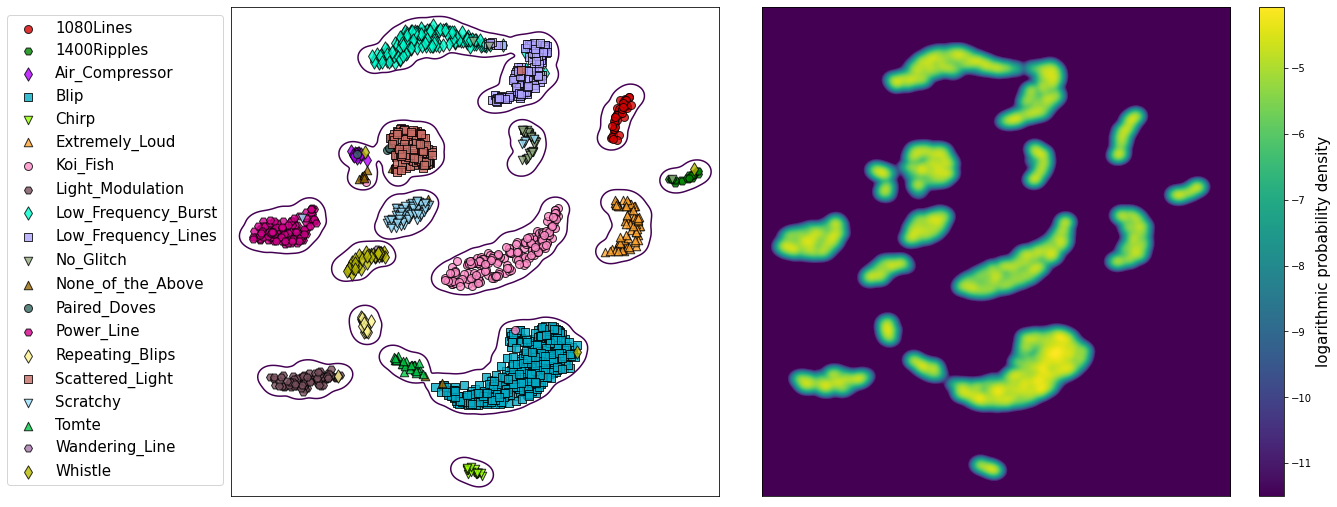

In [8]:
th = kde_th

xlim = (-16, 21)
ylim = (-24.5, 19)

ax_size_y = 9
ax_size_x = 20

fig, (ax1, ax2) = gen_mpl_map_heatmap(umap, y, score_grid, vmin=th, vmax=np.max(score_grid), #np.max(score_train), 
                                      x_range=x_range, y_range=y_range, ax_size_x=ax_size_x, 
                                      ax_size_y=ax_size_y, ratios=[1, 1.2])

ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
# ax1.set_aspect('auto')

ax1.legend(bbox_to_anchor=(0, 1), prop={'size': 15})

ax1.contour(X, Y, score_grid, levels=[th])

ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
# ax2.set_xlim(xlim)
# ax2.set_ylim(ylim)
ax2.set_aspect('auto')

cm = ax2.get_children()[-2]
cbar = plt.colorbar(cm, ax=ax2)
cbar.set_label('$\log(\mathbb{P}$)', size=15)
cbar.set_label('logarithmic probability density', size=15)

plt.subplots_adjust(wspace=0.08)

plt.show()
# plt.savefig('paper_figs/mpl_figs/pdfs/umap_test_val_heatmap.pdf', bbox_inches='tight')